In [13]:
import piplite
await piplite.install('seaborn')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

импортируем все нужные модули

In [15]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv')

In [16]:
pd.read_csv('mcs_ds_edited_iter_shuffled.csv')

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943
...,...,...,...,...,...,...
102,18,23,100,20,1.287472,0.375227
103,14,17,200,60,0.899102,0.231822
104,15,20,100,50,1.171140,0.372001
105,20,20,100,40,1.234493,0.599834


открываем и читаем таблицу

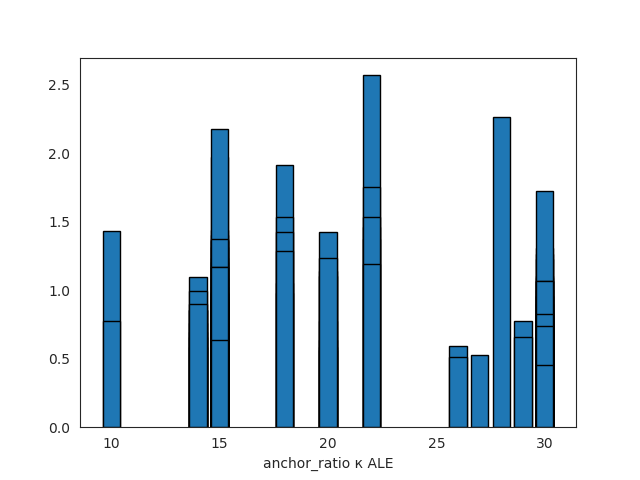

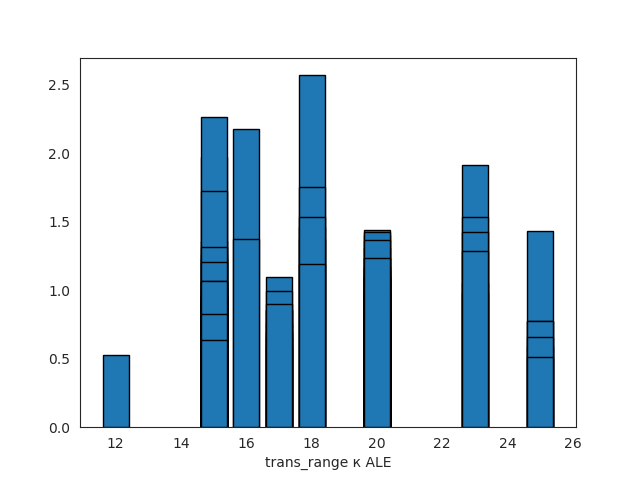

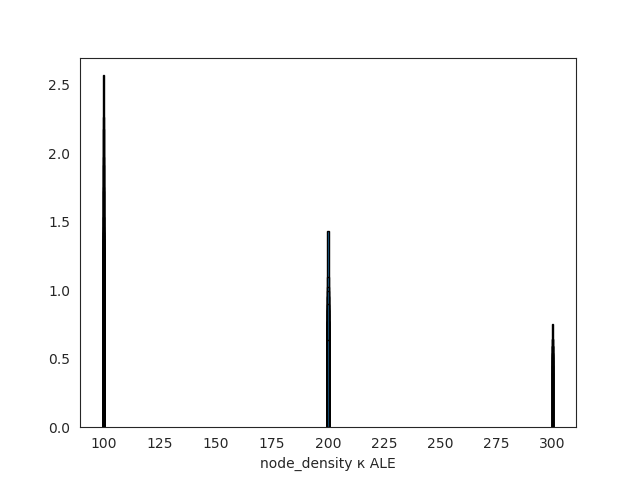

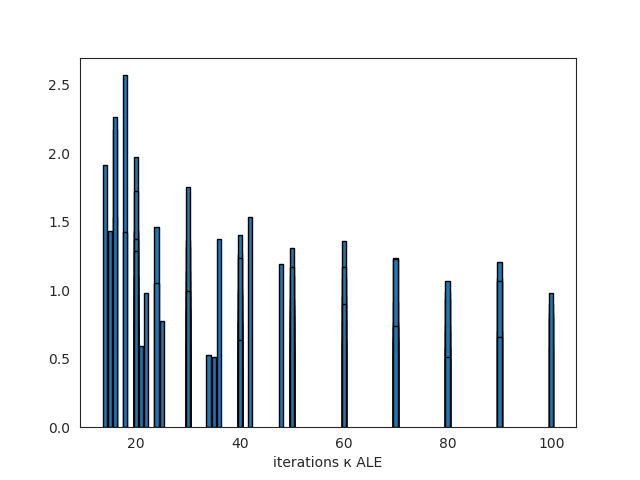

In [69]:
plt.figure()
plt.bar(data['anchor_ratio'],data['ale'], ec='black')
plt.xlabel('anchor_ratio к ALE')
plt.show()
plt.bar(data['trans_range'],data['ale'], ec='black')
plt.xlabel('trans_range к ALE')
plt.show()
plt.bar(data['node_density'],data['ale'], ec='black')
plt.xlabel('node_density к ALE')
plt.show()
plt.bar(data['iterations'],data['ale'], ec='black')
plt.xlabel('iterations к ALE')
plt.show()

создаем и выводим гистограммы зависимостей каждого атрибута в таргету (ale)

In [18]:
data.corr()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
anchor_ratio,1.000000,-0.094692,-0.116986,0.023167,-0.074997,-0.104657
trans_range,-0.094692,1.000000,-0.244055,-0.199315,0.109309,-0.076483
node_density,-0.116986,-0.244055,1.000000,-0.072426,-0.645927,-0.639097
iterations,0.023167,-0.199315,-0.072426,1.000000,-0.400394,-0.198966
ale,-0.074997,0.109309,-0.645927,-0.400394,1.000000,0.743958
sd_ale,-0.104657,-0.076483,-0.639097,-0.198966,0.743958,1.000000


выводим коэф коореляции

In [19]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

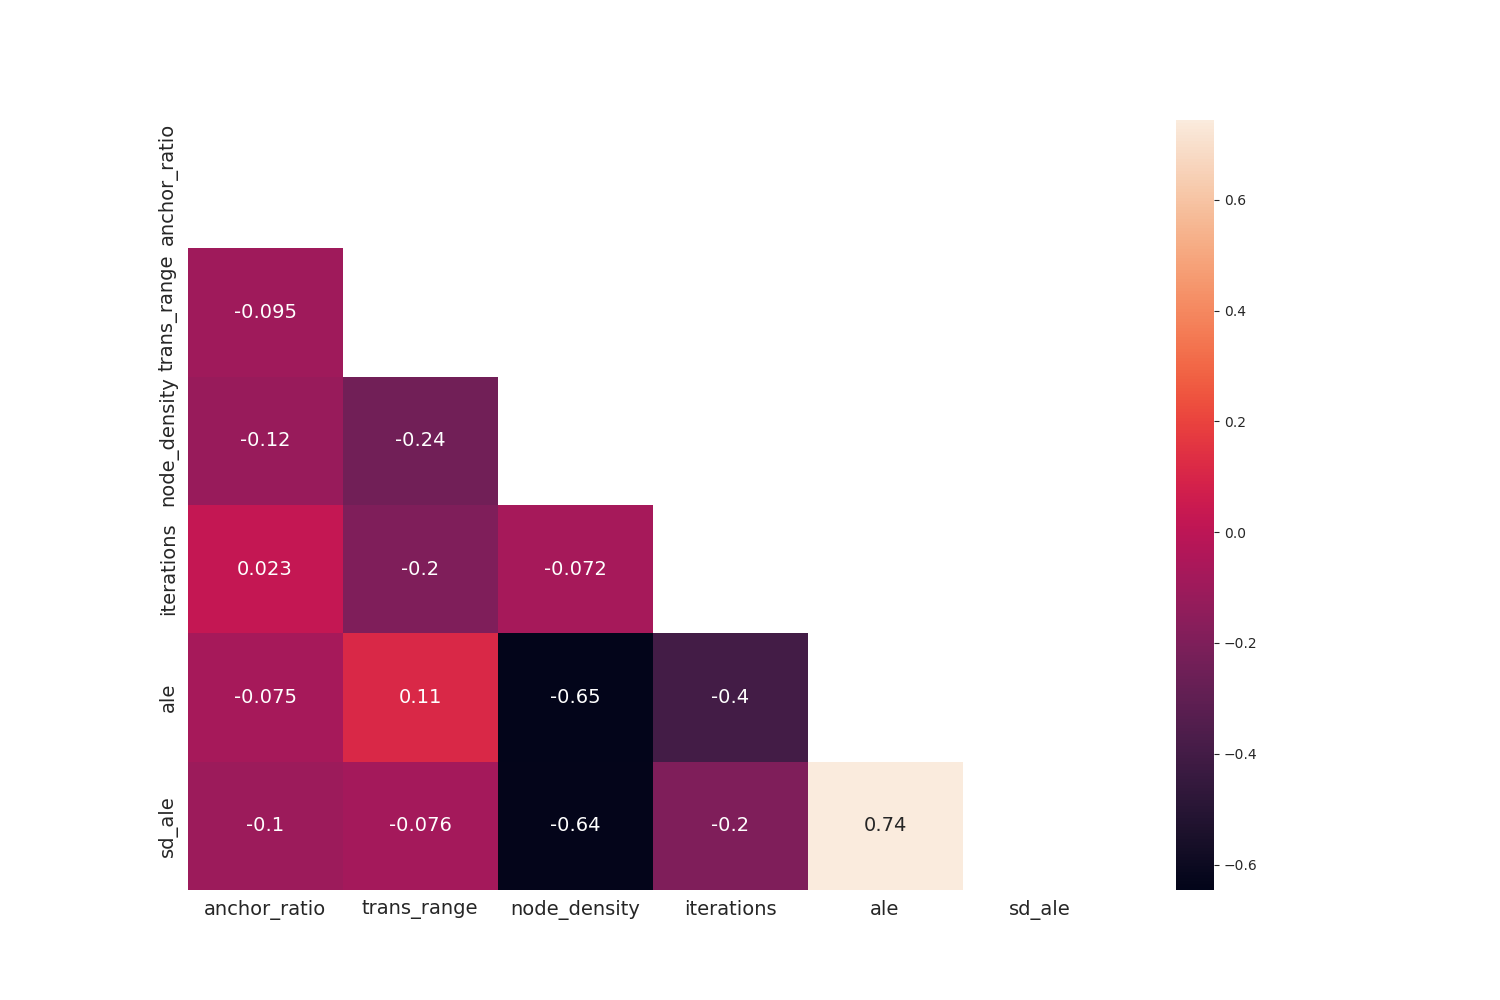

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

выводим эти коэф в виде таблицы теплоты и высчитываем итоговый коэф и интерсепт

In [45]:
X = data[['anchor_ratio']].values
y = data['ale'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

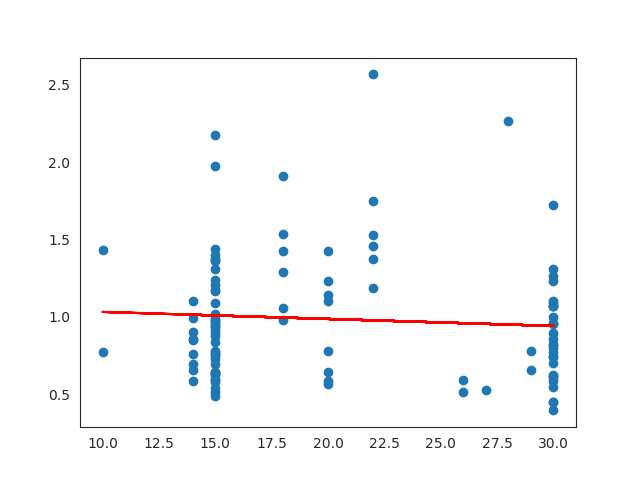

Slope: -0.00
Intercept: 1.08


In [46]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red');
plt.show()
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

In [43]:
X = data[['trans_range']].values
y = data['ale'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

далее создание линейной регрессии каждого атрибута к таргету

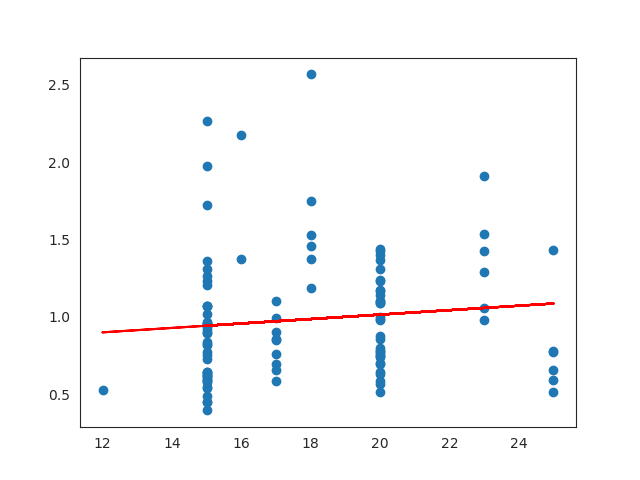

Slope: 0.01
Intercept: 0.73


In [44]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red');
plt.show()
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

это вывод. аналогичным образом выводим ещё 3 регрессии

In [40]:
X = data[['node_density']].values
y = data['ale'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)


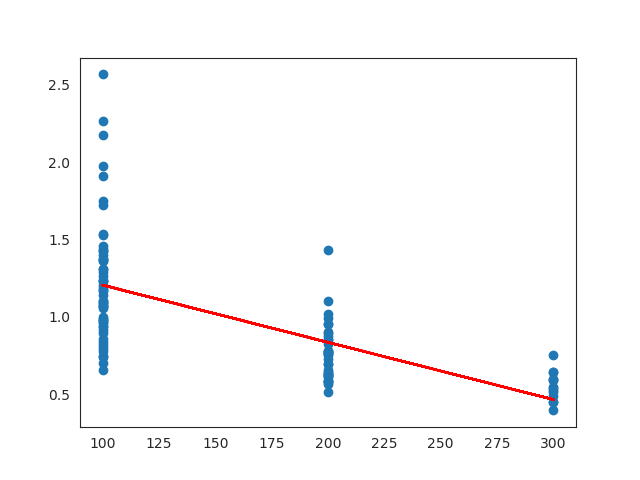

Slope: -0.00
Intercept: 1.58


In [42]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red');
plt.show()
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

In [47]:
X = data[['iterations']].values
y = data['ale'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)


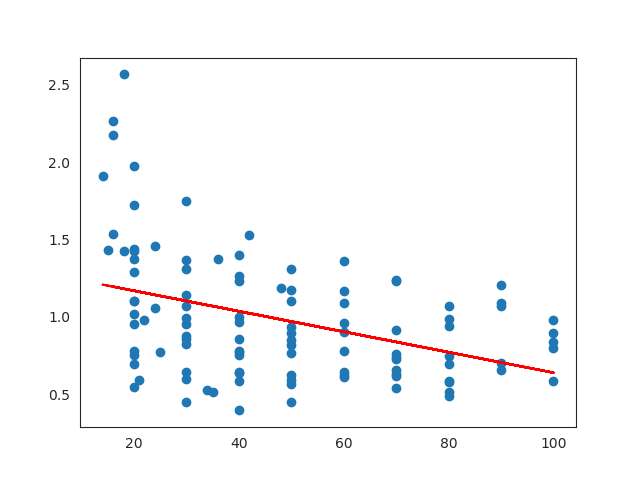

Slope: -0.01
Intercept: 1.30


In [48]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red');
plt.show()
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

In [67]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv', delimiter=',')

sd = data['ale']
features = data.drop('ale', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
sd, test_size=0.314, random_state=10)

In [68]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print('coef array:', regr.coef_)

Training data 0.727845519095376
Test data r-squared:  0.6717425658411711
Intercept 1.8016253430435625
coef array: [-0.00888937 -0.0056821  -0.0027282  -0.00624322  0.75179939]


затем высчитывааем модель множественной регрессии,итоговый массив коэф  и итоговый интерсепт и выводим 